In [3]:
#imports

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

#loading data into dataframe 

#loading ratings.csv
ratings_df = pd.read_csv('data/ml-latest-small/ratings.csv')

#loading movies.csv
movies_df = pd.read_csv('data/ml-latest-small/movies.csv')

#loading tags.csv
tags_df = pd.read_csv('data/ml-latest-small/tags.csv')

#loading links.csv
links_df = pd.read_csv('data/ml-latest-small/links.csv')


In [5]:

#How many items are in the data set? How many users? How many ratings?
n_movies = movies_df['movieId'].nunique()
n_users = ratings_df['userId'].nunique()
n_ratings = len(ratings_df)

print(f"The number items in the dataset:  {n_movies}")
print(f"The number of users:  {n_users}")
print(f"The number of ratings:  {n_ratings}")


The number items in the dataset:  9742
The number of users:  610
The number of ratings:  100836


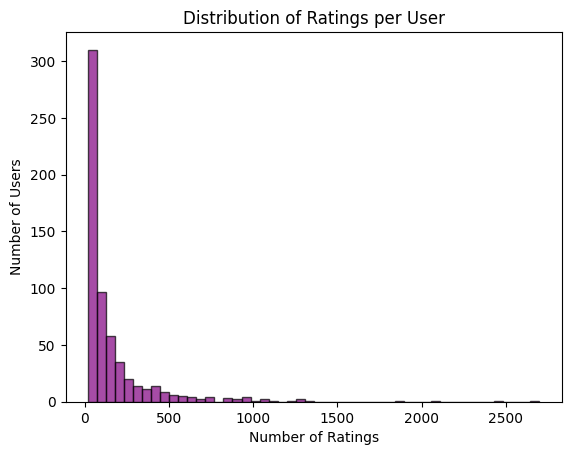

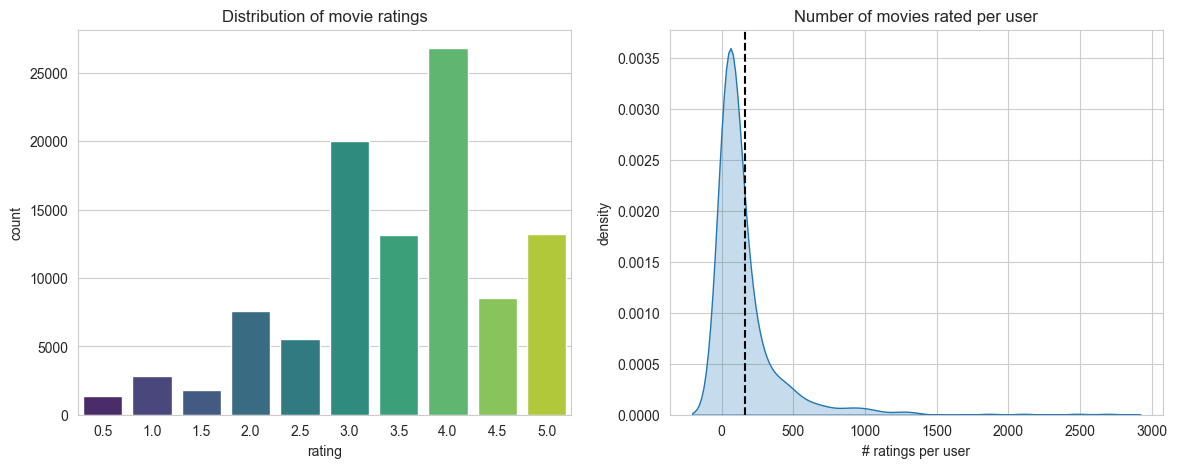

Some statistics: 
count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: n_ratings, dtype: float64


In [6]:

#User activity:
#    - What is the distribution of ratings-per-user?
user_freq = ratings_df[['userId', 'movieId']].groupby('userId').count().reset_index()
user_freq.columns = ['userId', 'n_ratings']

plt.hist(user_freq['n_ratings'], bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="rating", data=ratings_df, palette="viridis")
plt.title("Distribution of movie ratings")

plt.subplot(1,2,2)
ax = sns.kdeplot(user_freq['n_ratings'], fill=True, legend=False)
plt.axvline(user_freq['n_ratings'].mean(), color="k", linestyle="--")
plt.xlabel("# ratings per user")
plt.ylabel("density")
plt.title("Number of movies rated per user")
plt.show()

print(f"Some statistics: \n{user_freq['n_ratings'].describe()}")


In [7]:
#    - Find most and least active users for all 4 dataset. How many ratings did they provide.

ratings_user = ratings_df.groupby('userId')['rating'].count().reset_index()
ratings_user.columns = ['userId', 'n_ratings']

most_user = ratings_user.sort_values('n_ratings', ascending=False).iloc[0]
least_user = ratings_user.sort_values('n_ratings', ascending=True).iloc[0]

print(f"The most active user is user {most_user['userId']}. User {most_user['userId']} has {most_user['n_ratings']} ratings.")
print(f"The least active user is user {least_user['userId']}. User {least_user['userId']} has {least_user['n_ratings']} ratings.")


The most active user is user 414. User 414 has 2698 ratings.
The least active user is user 442. User 442 has 20 ratings.


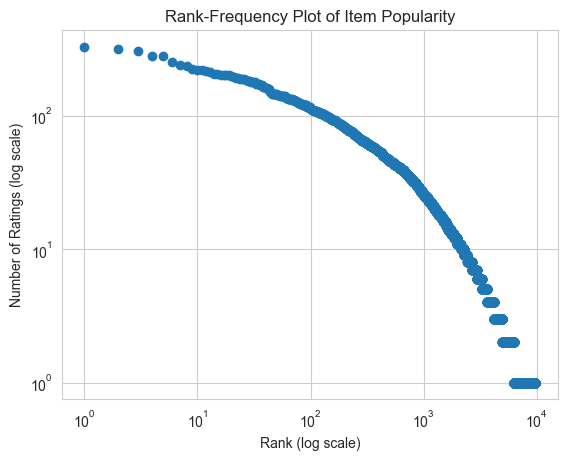

In [8]:

#Item statistics:
#    - What is the item popularity curve (the distribution of ratings-per-item)? A CDF plot on a log x scale or a rank-frequency plot on a log-log scale.

ratings_item = ratings_df.groupby('movieId')['rating'].count().reset_index()
ratings_item.columns = ['movieId', 'n_ratings']

sorted_ratings = ratings_item['n_ratings'].sort_values(ascending=False).values
ranks = np.arange(1, len(sorted_ratings)+1)

plt.figure()
plt.scatter(ranks, sorted_ratings)
plt.xscale('log')
plt.yscale('log')
plt.title('Rank-Frequency Plot of Item Popularity')
plt.xlabel('Rank (log scale)')
plt.ylabel('Number of Ratings (log scale)')
plt.show()



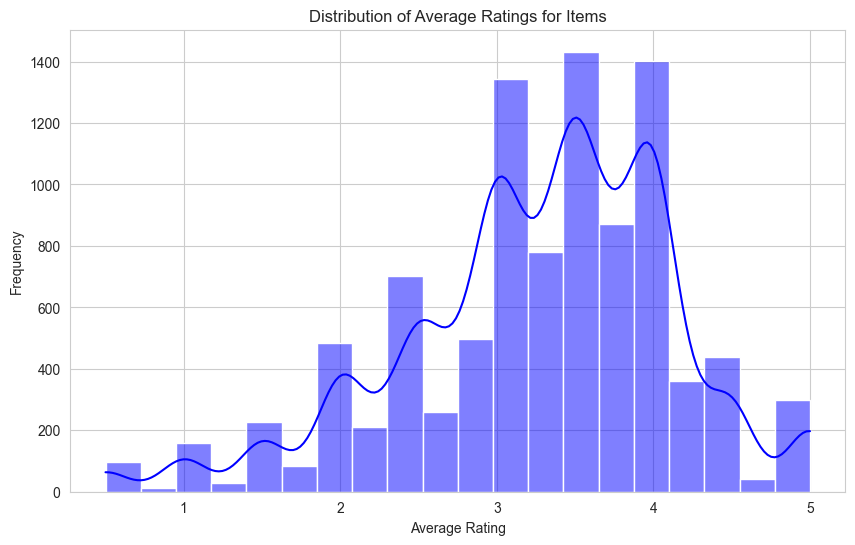

Stats for average rating: 
count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: avg_rating, dtype: float64


In [9]:
#    - What is the distribution of average ratings for items?

avg_ratings_item = ratings_df.groupby('movieId')['rating'].mean().reset_index()
avg_ratings_item.columns = ['movieId', 'avg_rating']

plt.figure(figsize=(10, 6))
sns.histplot(avg_ratings_item['avg_rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Average Ratings for Items')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

print(f"Stats for average rating: \n{avg_ratings_item['avg_rating'].describe()}")


In [10]:
#Non-personalized recommendation
#   - What are the 10 most popular items (the items with the most ratings)? Show the item ID, item title, and the number of ratings.

pop_items = ratings_df.groupby('movieId')['rating'].count().reset_index()
pop_items.columns = ['movieId', 'n_ratings']

top10_pop_item = pop_items.sort_values('n_ratings', ascending=False).head(10)
top10_pop_item = top10_pop_item.merge(movies_df[['movieId', 'title']], on='movieId')

print('The 10 most popular items: \n')
print(top10_pop_item[['movieId', 'title', 'n_ratings']])



The 10 most popular items: 

   movieId                                      title  n_ratings
0      356                        Forrest Gump (1994)        329
1      318           Shawshank Redemption, The (1994)        317
2      296                        Pulp Fiction (1994)        307
3      593           Silence of the Lambs, The (1991)        279
4     2571                         Matrix, The (1999)        278
5      260  Star Wars: Episode IV - A New Hope (1977)        251
6      480                       Jurassic Park (1993)        238
7      110                          Braveheart (1995)        237
8      589          Terminator 2: Judgment Day (1991)        224
9      527                    Schindler's List (1993)        220


In [11]:
#   - What are the 10 items with the highest average ratings (with their titles and average ratings)?

high_avg_rating = ratings_df.groupby('movieId')['rating'].mean().reset_index()
high_avg_rating.columns = ['movieId', 'avg_rating']

top10_avg_rating = high_avg_rating.sort_values('avg_rating', ascending=False).head(10)
top10_avg_rating = top10_avg_rating.merge(movies_df[['movieId', 'title']], on='movieId')

print("The 10 items with the highest average ratings are:")
print(top10_avg_rating[['movieId', 'title', 'avg_rating']])


The 10 items with the highest average ratings are:
   movieId                                      title  avg_rating
0    88448      Paper Birds (Pájaros de papel) (2010)         5.0
1   100556                 Act of Killing, The (2012)         5.0
2   143031                            Jump In! (2007)         5.0
3   143511                               Human (2015)         5.0
4   143559                        L.A. Slasher (2015)         5.0
5     6201                           Lady Jane (1986)         5.0
6   102217             Bill Hicks: Revelations (1993)         5.0
7   102084               Justice League: Doom (2012)          5.0
8     6192  Open Hearts (Elsker dig for evigt) (2002)         5.0
9   145994                     Formula of Love (1984)         5.0


In [12]:
#   - What are the 10 movies with the highest damped average ratings, with a Bayesian damping factor of 5? Show both the damped and undamped mean for these items. You can also use the bias model (without user biases) to compute these means. The damped mean with factor 
#     is computed by: $r^~i=\frac{\Sum{r_{ui}\in R_i}r_{ui}}+\gamma*r^¯)}{|R_i|+ \gamma}$ .

movie_stats = ratings_df.groupby('movieId')[['rating']].agg(['count', 'mean']).reset_index()
movie_stats.columns = ['movieId', 'count', 'undamped_mean']

In [13]:
gamma = 5
global_mean = ratings_df['rating'].mean()

movie_stats['damped_mean'] = (movie_stats['count'] * movie_stats['undamped_mean']+gamma*global_mean) / (movie_stats['count']+ gamma)

movie_stats = movie_stats.merge(movies_df[['movieId', 'title']], on='movieId')
top10_movies = movie_stats.sort_values('damped_mean', ascending=False).head()

print(top10_movies[['title', 'damped_mean', 'undamped_mean']])

                                                 title  damped_mean   
277                   Shawshank Redemption, The (1994)     4.414620  \
840                   Streetcar Named Desire, A (1951)     4.280311   
9600  Three Billboards Outside Ebbing, Missouri (2017)     4.269830   
659                              Godfather, The (1972)     4.269075   
2224                                 Fight Club (1999)     4.255640   

      undamped_mean  
277        4.429022  
840        4.475000  
9600       4.750000  
659        4.289062  
2224       4.272936  


In [14]:
#Contextual recommendation (MovieLens only)
#   - What are the 5 most popular movies among users who also watched shawshank redemption (not counting Shawshank Redemption itself)?



from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    N = df['userId'].nunique()
    M = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(N))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(M))))
    
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(M)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    movie_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (movie_index, user_index)), shape=(M, N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper




In [15]:
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings_df)


In [16]:
sparsity = X.count_nonzero()/(X.shape[0]*X.shape[1])

print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 1.7%


In [17]:
from scipy.sparse import save_npz

save_npz('data/user_item_matrix.npz', X)

In [18]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, k, metric='cosine', show_distance=False):
    """
    Finds k-nearest neighbours for a given movie id.
    
    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Returns:
        list of k similar movie ID's
    """
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(movie_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [19]:
movie_titles = dict(zip(movies_df['movieId'], movies_df['title']))

shawshank_df = movies_df[movies_df['title'].str.contains('Shawshank Redemption', case=False)]
shawshank_id = shawshank_df['movieId'].values[0]

similar_ids = find_similar_movies(shawshank_id, X, k=5)
movie_title = movie_titles[shawshank_id]

print(f"Because you watched {movie_title}")
for i in similar_ids:
    print(movie_titles[i])

Because you watched Shawshank Redemption, The (1994)
Forrest Gump (1994)
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Usual Suspects, The (1995)
Schindler's List (1993)


In [20]:
#   - What are the 5 most popular movies among users who also watched 10 Things I Hate About You?

movie_titles = dict(zip(movies_df['movieId'], movies_df['title']))

things_Ihate_df = movies_df[movies_df['title'].str.contains('Things I Hate About You', case=False)]
things_Ihate_id = things_Ihate_df['movieId'].values[0]

similar_ids = find_similar_movies(things_Ihate_id, X, k=5)
movie_title = movie_titles[things_Ihate_id]

print(f"Because you watched {movie_title}")
for i in similar_ids:
    print(movie_titles[i])


Because you watched 10 Things I Hate About You (1999)
Bring It On (2000)
She's All That (1999)
Wedding Singer, The (1998)
Never Been Kissed (1999)
Easy A (2010)


In [21]:
#   - Pick another movie to generate a top-5 list for

movie_titles = dict(zip(movies_df['movieId'], movies_df['title']))

movie_id = 7

similar_ids = find_similar_movies(movie_id, X, k=5)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}")
for i in similar_ids:
    print(movie_titles[i])

Because you watched Sabrina (1995)
Truth About Cats & Dogs, The (1996)
Father of the Bride Part II (1995)
Mr. Holland's Opus (1995)
Birdcage, The (1996)
Tin Cup (1996)
